## 1. 빅데이터 수집

### 1) 빅데이터 수집 개요
---

- 빅데이터 시스템 구축은 수집에서부터 시작
 - 빅데이터 프로젝트는 여러 공정 단계가 존재하지만 수집이 절반 이상을 차지
 - 빅데이터 수집은 내부 전체 시슽템에서부터 외부 시스템(SNS, 포털, 정보기관 등)에 이르기까지 매우 광범위하고 다양
- 빅데이터 수집 절차

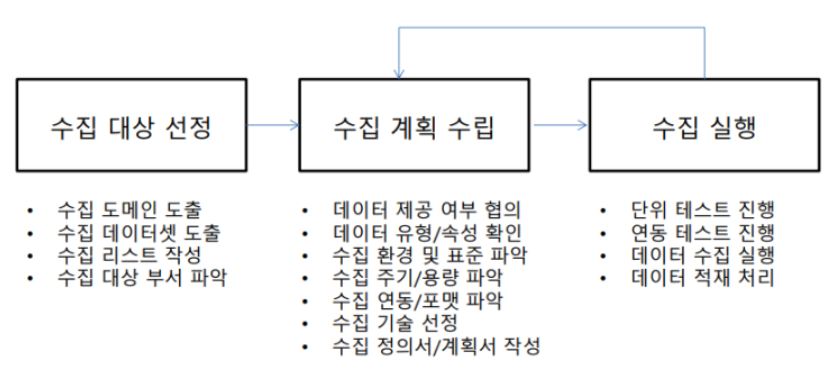

- 수집 기술들이 매우 빠르게 발전
 - 과거에 빅데이터는 전형적인 프로세싱은 수집/적재 후, 맵리듀스 기반의 주기적인 배치성 분석을 수행
 - 현재는 수집과 동시에 분석을 수행하는 ESP/CEP 기술들이 빅데이터의 수집 영역에 적용되고 있는 추세

### 2) 빅데이터 수집에 활용할 기술
---

**플럼**

- 빅데이터를 수집할 때 다양한 수집 요구사람들을 해결하기 위한 기능으로 구성된 소프트웨어
- 데이터를 원천으로부터 수집할 때 통신 프로토콜, 메시지 포매, 발생 주기, 데이터 크기 등의 문제가 발생
 - 플럼은 위의 문제를 해결할 기능과 아키텍처를 제공
- http://flume.apache.org/

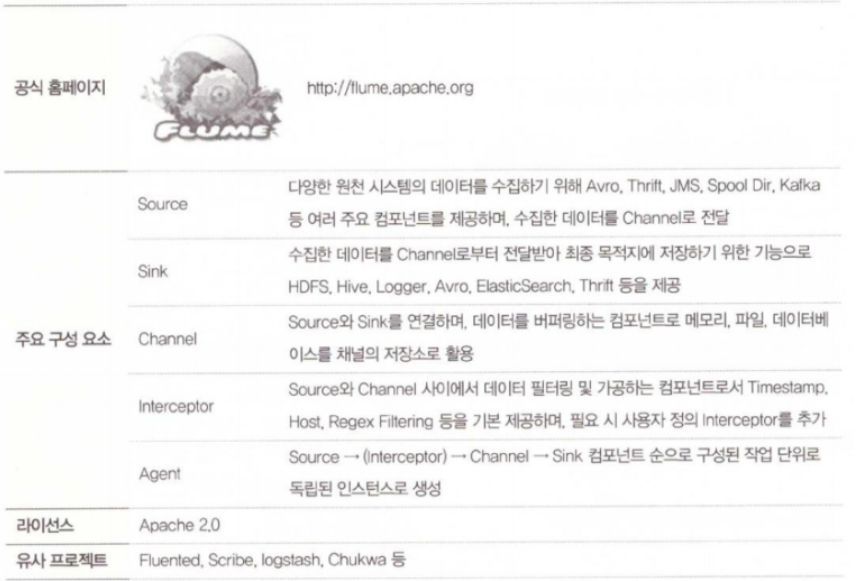

<center> 플럼 기본 요소 </center>

**카프카**

- MOM 소프트워어 중 하나로 대규모로 발생하는 메시지성 데이터를 비동기 방식으로 중계하는 역할
- 원천 시스템으로부터 대규모 트랜젝션 데이터가 발생했을 때 중간에 데이터를 버퍼링하면서 타깃 시스템에 안정적으로 전송해주 시스템이 필요
 - 카프카는 위와 관련된 강력한 기능과 아키텍처를 제공
- http://kafka.apache.org/

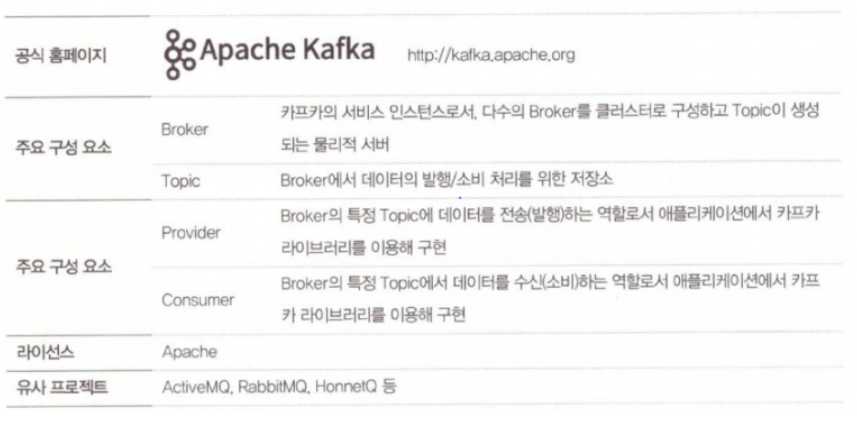

<center> 카프카의 기본 요소 </center>

## 2. 빅데이터 적재 - 대용량 로그 파일 적재

### 1) 빅데이터 적재 개요
---

- 수집한 데이터는 특징에 따라 처리 방식과 적재 위치가 달라짐
 - 데이터 발생 주기에 따라 일괄 배치성 데이터 인지, 실시간 스트림 데이터 인지 판단
 - 데이터의 형식에 따라 가공 처리나 사전 검증 작업을 할 것인지 판단
- 적재한 데이터를 어떤 비즈니스 요건에서 활용하느냐에 따라 적재 대상 위치가 달라짐
 - 데이터 분석 방식과 활용성 및 업무 시스템의 성격에 따라 분산 파일, NoSQL, 메모리 캐시로 구분해서 저장

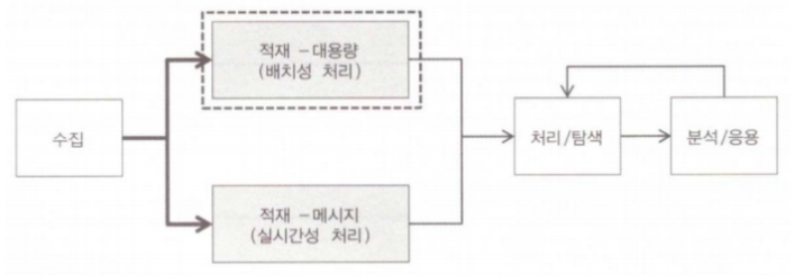

### 2) 빅데이터 적재에 활용하는 기술
---

**하둡**

- 빅데이터의 핵심소프트 웨어
 - 에코시스템들은 대부분 하둡을 위해 존재하고 하둡에 의존해서 발전
- 하둡의 두가지 기능
 - 첫 번째가 대용량 데이터를 분산 저장하는 것
 - 두 번째는 분산 저장된 데이터를 가공/분석 처리하는 기능
   - 데이터 가공/분석을 위해 분산 병렬 처리 기술을 사용
- 넛치/루씬 검색엔진의 서브 프로젝트로 하둡 프로젝트를 추진하면서 분산 컴퓨팅 기술의 저변 확대가 시작
- http://hadoop.apache.org/

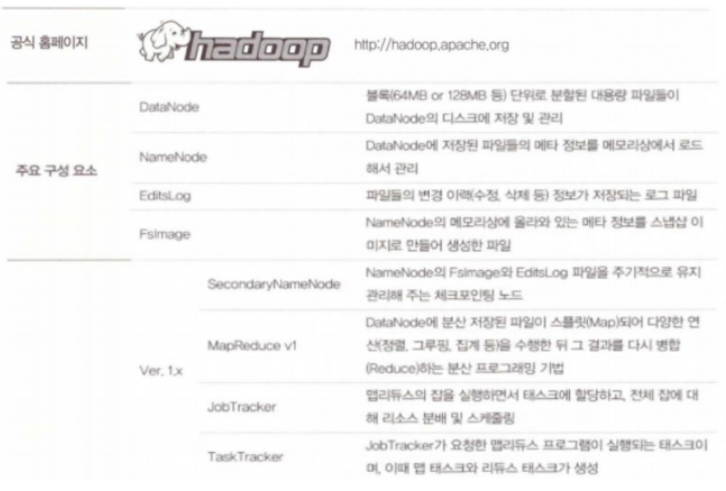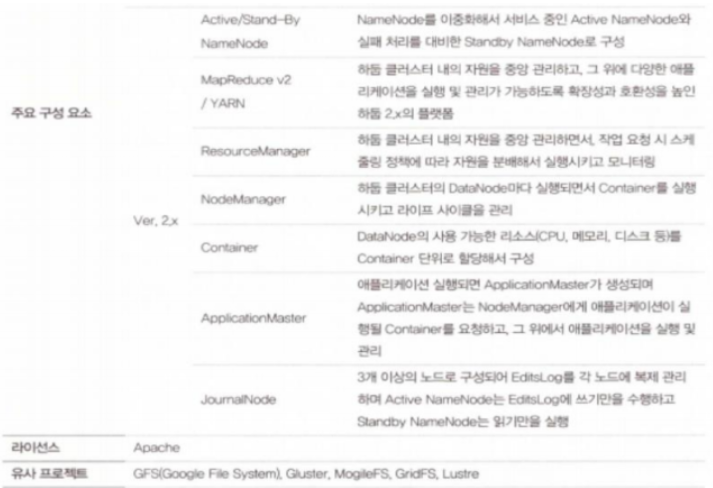

<center> 하둡의 기본 요소 </center>

**주키퍼**

- 빅데이터의 분산 환경을 더욱 효율적으로 관리하기 위해서 서버 간의 정보를 쉽고 안전하게 공유
 - 공유된 정보를 이용해 서버 간의 중요한 이벤트를 관리하면서 상호작용을 조율해 주는 코디네이터 시스템
- 주키퍼는 하둡, HBase, 카프카, 스톰 등의 분산 노드 관리에 사용 중
- https://zookeeper.apache.org/

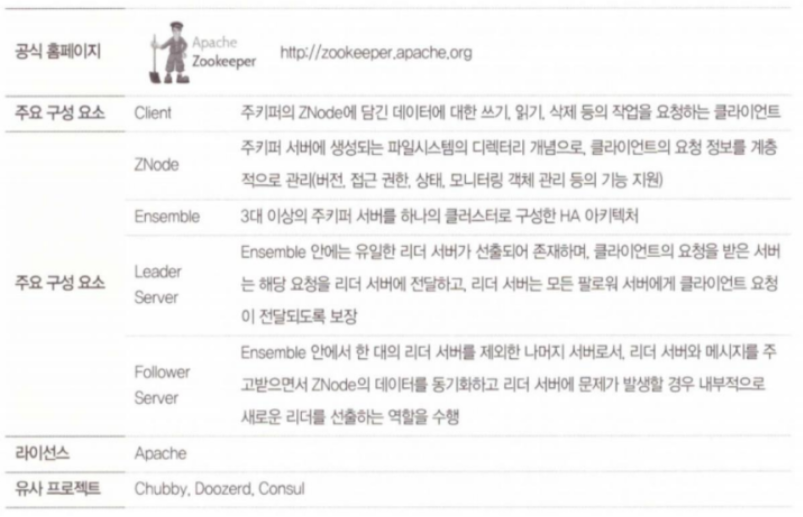

<center> 주키퍼의 기본 요소 </center>

## 3. 빅데이터 적재 - 실시간 로그/분석 적재


### 1) 빅데이터 실시간 적재 개요
---

- 실시간 로그 분석에서는 작지만 대량으로 발생하는 메시지성 데이터를 실시간으로 분석(집계, 분류, 관계 등) 처리하며, 해당 결과를 인메모리에 저장해 주변 시스템과 빠르게 공유
- 대량의 메시지 데이터를 영구 저장하기 위해 하둡을 직접 이용하지 않음
 - 유입된 작은 메시지 한 건을 곧바로 하둡에 저장하면 한 개의 HDFS생성, 초당 수천 건의 트랜잭션이 발생하는 메시지의 경우 파일 수가 기하급수 적으로 증가
   - 하둡 클러스터에 지나친 오버헤드가 발생
- 중간에 메시지를 특정 크기로 모았다가 한꺼번에 적재하거나 대규모 트랜젝션 데이터를 처리하는 데 최적화된 칼럼 지향형 NoSQL 데이터 베이스를 주로 사용

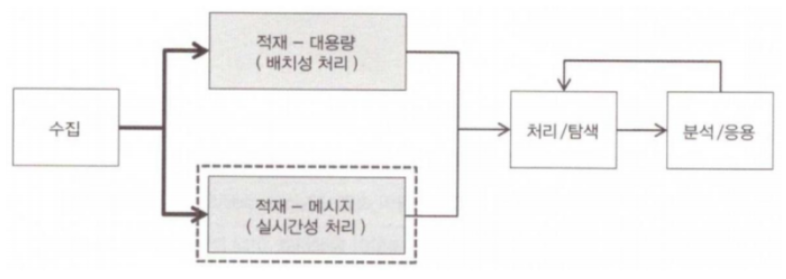

### 2) 빅데이터 실시간 적재에 활용하는 기술
---

**HBase**

- NoSQL 데이터베이스는 키/값 구조로 단순화, 칼럼 또는 도큐먼트 형식의 제약사항이 적은 스키마 모델로 만들어 고성능 쓰기/읽기가 가능하다는 공통점
- 스키마 변경이 자유롭고, 리전이라는 분산 서버로 샤딩과 복제 등의 기능을 지원해 성능과 안정성을 보장
- 하둡의 확장성과 내고장성을 그대로 이용할 수 있어 대규모 실시간 데이터 처리를 위한 스피드 레이어 저장소에 HBase가 주로 이용
- https://hbase.apache.org/

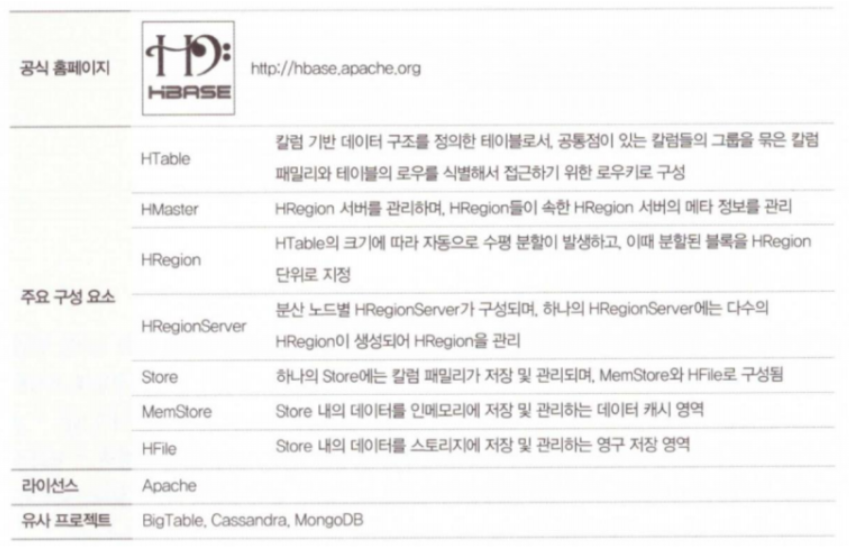

**레디스**

- 분산 캐시 시스템이면서 NoSQL 데이터베이스처럼 대규모 데이터 관리 능력고 갖춘 IMDG 소프트웨어
- 키/값 형식의 데이터 구조를 분산 서버상의 메모리에 저장하면서 고성능의 응답 속도를 보장
- 다양한 데이터 타입을 지원하기 때문에 데이터를 구조화해서 저장할 수 있어 단순 키/값 이상의 데이터 복잡성도 처리
- 인메모리 데이터를 연구적으로 저장할 수 있는 스냇샵 기능을 제공
- 데이터의 유실에 대비해 AOF 기능으로 정합성을 보장
- 데이터 샤딩과 복제도 지원하고 있어 높은 성능이 필요한 서비스에서 많이 사용
- https://www.redis.io/

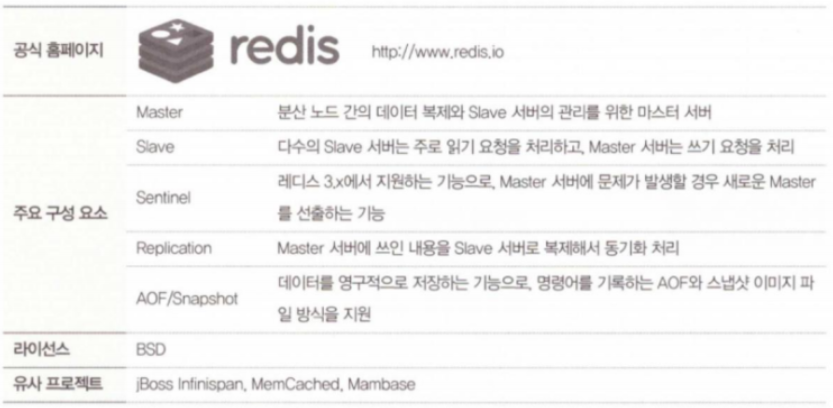

**스톰**

- 스피드 데이터를 인메모리 상에서 병렬 처리하기 위한 소프트웨어
- 스피드 데이터는 원천 시스템의 수많은 이벤트(클릭/터치, 위치, IoT 등)가 만들내며, 작지만 대규모의 동시다발적이라는 특징
- 스피드 데이터를 실시간으로 분석할 수 있다면 원천에서 무슨 일이 발생하고 있는지 빠르게 알아낼 수 있음
 - 마케팅과 리스크 등의 분야에서 활용 가치가 높음
- 스피드 데이터를 실시간으로 다루기 위해 모든 데이터를 인메모리 상에서 분산 병렬 처리하고, 분산 데이터를 통제하기 위한 강력한 기능(분리, 정제, 통계 등)과 아키텍처도 제공
- https://storm.apache.org/

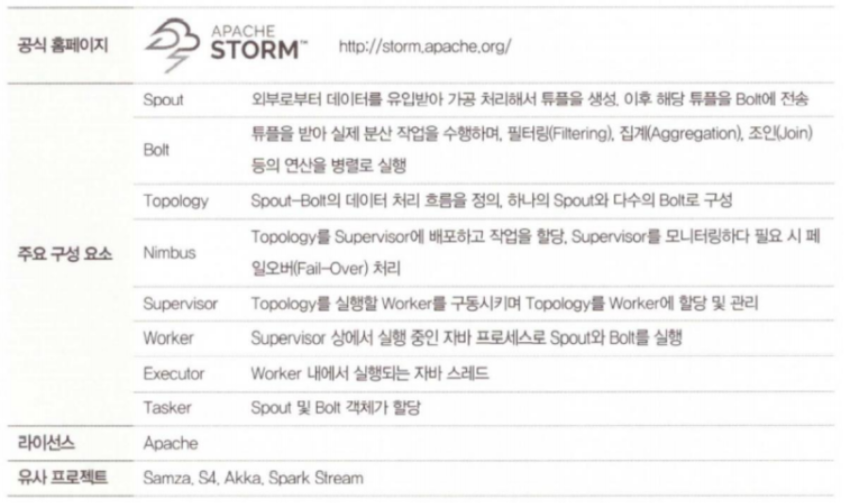

**에스퍼**

- 실시간 스트리밍 데이터의 복잡한 이벤트 처리가 필요할 때 사용하는 룰 엔진
- 실시간으로 발생하는 데이터 간의 관계를 복합적으로 판단 및 처리하는 기능(CEP)을 제공
- CEP처리를 위한 다향한 조건과 복합 이벤트를 하나의 룰로 쉽게 정의할 수 있어 CEP 처리 및 관리가 수월
- https://www.espertech.com/